In [1]:
!pip install -q -U google-generativeai

In [2]:
import google.generativeai as genai
import pathlib
import textwrap
from IPython.display import display
from IPython.display import Markdown

In [3]:
def to_markdown(text):
  text = text.replace('.',' *')
  return Markdown(textwrap.indent(text,'> ',predicate=lambda _:True))

# Example Usage
input_text = "This is . sample text with dots"
result = to_markdown(input_text)
display(result)

> This is  * sample text with dots

Setup Google API Key

In [4]:
# Used to securely store your API Key
from google.colab import userdata

In [5]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

In [6]:
genai.configure(api_key=GOOGLE_API_KEY)

In [7]:
#List those models only which are responsible to generate the content
for models in genai.list_models():
  if 'generateContent' in models.supported_generation_methods:
    print(models.name)

models/gemini-1.5-pro-latest
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp

Generate Text from Text

In [8]:
model = genai.GenerativeModel('gemini-2.5-flash')

In [9]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 130 ms, sys: 15 ms, total: 145 ms
Wall time: 12.3 s


In [10]:
response.text

'That is one of the oldest, most profound, and most debated questions in human history! And the most honest answer is: **there is no single, universally agreed-upon meaning of life.**\n\nInstead, the "meaning of life" is approached in many different ways, often depending on an individual\'s beliefs, culture, and personal experiences. Here are some of the most common perspectives:\n\n1.  **No Inherent Meaning (Existentialism):**\n    *   This view, often associated with existentialist philosophers like Jean-Paul Sartre and Albert Camus, posits that life has no pre-ordained or objective meaning. We are simply "thrown into existence."\n    *   However, this isn\'t necessarily pessimistic. It implies that we have the ultimate freedom and responsibility to **create our own meaning**. We define our purpose through our choices, actions, and values.\n\n2.  **Divine or Spiritual Purpose:**\n    *   Many religions and spiritual traditions offer a meaning of life rooted in a higher power or cosmi

In [11]:
response.candidates

[content {
  parts {
    text: "That is one of the oldest, most profound, and most debated questions in human history! And the most honest answer is: **there is no single, universally agreed-upon meaning of life.**\n\nInstead, the \"meaning of life\" is approached in many different ways, often depending on an individual\'s beliefs, culture, and personal experiences. Here are some of the most common perspectives:\n\n1.  **No Inherent Meaning (Existentialism):**\n    *   This view, often associated with existentialist philosophers like Jean-Paul Sartre and Albert Camus, posits that life has no pre-ordained or objective meaning. We are simply \"thrown into existence.\"\n    *   However, this isn\'t necessarily pessimistic. It implies that we have the ultimate freedom and responsibility to **create our own meaning**. We define our purpose through our choices, actions, and values.\n\n2.  **Divine or Spiritual Purpose:**\n    *   Many religions and spiritual traditions offer a meaning of lif

We can also stream the output while it generates

In [12]:
%%time
response = model.generate_content("What is the meaning of life?",
                                  stream=True)
for chunk in response:
  print(chunk.text)
  print("_"*80)

Ah, the ultimate question! The "meaning of life" is one of the most profound and enduring philosophical inquiries, and **there isn't one universal, definitive answer that applies to everyone.**


________________________________________________________________________________
Instead, the "meaning of life" is something that has been explored, debated, and defined in countless ways across cultures, religions, philosophies, and individual experiences throughout history.

Here's a breakdown of common perspectives:

1.  
________________________________________________________________________________
**Given Meaning (Religious/Spiritual Frameworks):**
    *   **Divine Purpose:** For many, the meaning of life is found in a higher power or God's plan. Life's purpose is to fulfill divine will, achieve
________________________________________________________________________________
 salvation, grow spiritually, or prepare for an afterlife. This meaning is often seen as objective and pre-ordain

Generate text from images and text inputs

This will download the images inside the memory

In [13]:
!curl -o image.jpg https://miteshmfa.s3.ap-south-1.amazonaws.com/shutterstock_514798843.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  225k  100  225k    0     0   148k      0  0:00:01  0:00:01 --:--:--  148k


In [14]:
!curl -o image2.jpg https://www.istockphoto.com/photo/raw-vegetables-and-fruit-thats-good-for-gut-health-microbiome-gm2151881370-572937631?searchscope=image%2Cfilm

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  366k    0  366k    0     0   720k      0 --:--:-- --:--:-- --:--:--  720k


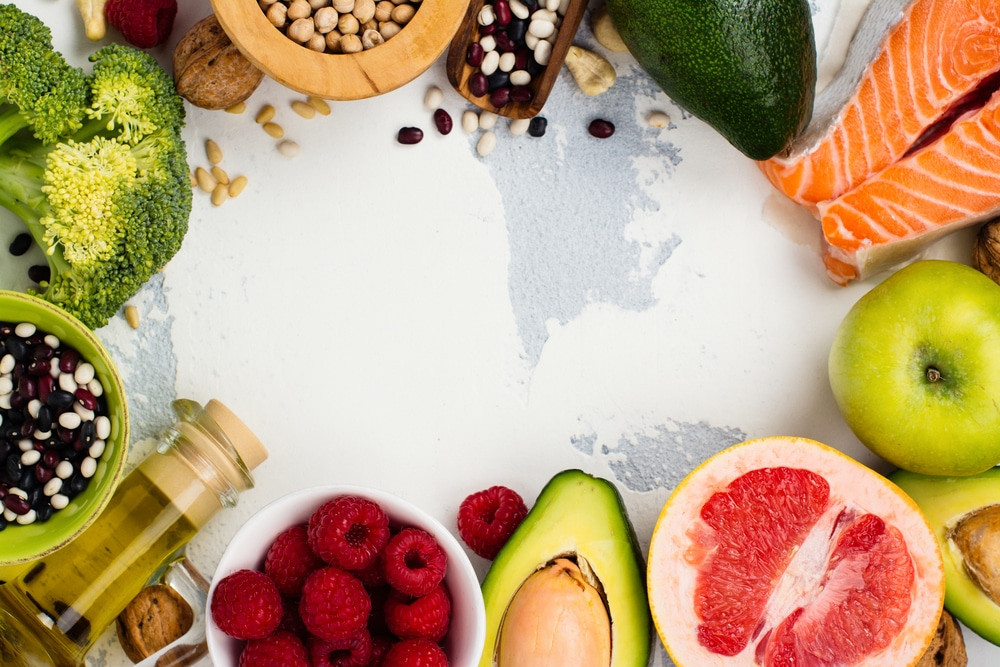

In [15]:
import PIL.Image
img = PIL.Image.open('image.jpg')
img

In [16]:
def clean_response_text(text):
  """Clears unwanted characters from the response text.

  Args:
    text: The input string from response.text.

  Returns:
    A cleaned string with unwanted characters removed.
  """
  # Remove newline characters
  cleaned_text = text.replace('\n', ' ')
  # Remove '*' characters
  cleaned_text = cleaned_text.replace('*', '')
  return cleaned_text

# Example Usage:
# assuming 'response' object with 'text' attribute is available
# cleaned_output = clean_response_text(response.text)
# print(cleaned_output)

In [17]:
response = model.generate_content(img)

In [18]:
response.text

'This image is a top-down view of a diverse selection of fresh and healthy foods, arranged around an empty central space on a textured white and light blue-grey surface.\n\nKey items visible include:\n*   **Top left:** A large head of broccoli, a light green bowl filled with various types of beans (black, white, red kidney), and a small glass bottle of olive oil. Scattered around are walnuts, pine nuts, and cashew nuts.\n*   **Bottom left:** A white bowl brimming with fresh red raspberries.\n*   **Bottom right:** Half of a pink grapefruit, a whole green apple, and two halves of an avocado, one showing its large pit.\n*   **Top right:** Two bright orange salmon fillets.\n\nThe arrangement suggests a theme of balanced nutrition, healthy eating, or ingredients for a wholesome meal, with a mix of fruits, vegetables, lean protein, healthy fats, and legumes. The central empty area provides a natural space for text or other elements if used in a design context.'

In [19]:
clean_response_text(response.text)

'This image is a top-down view of a diverse selection of fresh and healthy foods, arranged around an empty central space on a textured white and light blue-grey surface.  Key items visible include:    Top left: A large head of broccoli, a light green bowl filled with various types of beans (black, white, red kidney), and a small glass bottle of olive oil. Scattered around are walnuts, pine nuts, and cashew nuts.    Bottom left: A white bowl brimming with fresh red raspberries.    Bottom right: Half of a pink grapefruit, a whole green apple, and two halves of an avocado, one showing its large pit.    Top right: Two bright orange salmon fillets.  The arrangement suggests a theme of balanced nutrition, healthy eating, or ingredients for a wholesome meal, with a mix of fruits, vegetables, lean protein, healthy fats, and legumes. The central empty area provides a natural space for text or other elements if used in a design context.'

In [20]:
response = model.generate_content(["write a short, engaging blog post based on this picture. It should include a description of all the individal fruit inside it", img],stream=True)

In [21]:
response

response:
GenerateContentResponse(
    done=False,
    iterator=<ResponseIterator>,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "##"
              }
            ],
            "role": "model"
          },
          "index": 0
        }
      ],
      "usage_metadata": {
        "prompt_token_count": 284,
        "candidates_token_count": 1,
        "total_token_count": 1819
      },
      "model_version": "gemini-2.5-flash"
    }),
)

# Let's Dicsuss about Generation Configuration

In [22]:
model1 = genai.GenerativeModel('gemini-2.5-flash')

In [23]:
model1.generate_content("What is the some best use case of gen ai").text

"Generative AI (Gen AI) excels in tasks that require creativity, synthesis, and the production of novel content. Here are some of the best and most impactful use cases across various industries:\n\n1.  **Content Creation & Marketing:**\n    *   **Automated Content Generation:** Drafting blog posts, articles, marketing copy, social media updates, product descriptions, email newsletters, and even scripts for videos or podcasts.\n    *   **Ad Creative Generation:** Producing multiple variations of ad copy and visual concepts for A/B testing, optimizing campaign performance.\n    *   **Personalized Marketing:** Creating highly individualized marketing messages, product recommendations, and offers based on user data and behavior.\n    *   **Image & Video Generation:** Generating unique images, illustrations, product mockups, and even short video clips for marketing materials, presentations, or digital art.\n    *   **Audio & Music Generation:** Creating custom voiceovers, sound effects, or 

In [24]:
response = model.generate_content(
    "tell me the story about the avengers",
    generation_config=genai.types.GenerationConfig(
        # only one candidate
        candidate_count=1,
        stop_sequences=["x"],
        max_output_tokens=20,
        temperature=1.0
    )
)

In [25]:
response.text

''

Chat Coversations

In [26]:
chat = model1.start_chat(history=[])

In [27]:
response = chat.send_message("In one sentence, explain how a computer works to a young child")

In [28]:
response.text

'A computer takes your instructions, thinks super fast to figure things out, and then shows you the answer or picture on the screen.'

In [29]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child"
 }
 role: "user",
 parts {
   text: "A computer takes your instructions, thinks super fast to figure things out, and then shows you the answer or picture on the screen."
 }
 role: "model"]

In [30]:
response = chat.send_message("Okey, how about a more detailed explaination to a high school guy",stream=True)

In [31]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

Okay, for a high schooler, we can dive a bit deeper into the core components and their interplay:

At its fundamental level, a computer is an electronic machine that processes data by taking input,
________________________________________________________________________________
 executing instructions, and producing output.

1.  **Input & Output:** You interact with the computer using **input devices** (keyboard, mouse, microphone, camera) which convert your actions or external signals into digital data. The computer
________________________________________________________________________________
 then presents results via **output devices** (screen, speakers, printer) by converting digital data into human-perceivable forms.

2.  **The Brain (CPU):** The **Central Processing Unit (CPU)** is the "
________________________________________________________________________________
brain" – it executes instructions from software, performs arithmetic and logical operations, and manages the fl

In [32]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child"
 }
 role: "user",
 parts {
   text: "A computer takes your instructions, thinks super fast to figure things out, and then shows you the answer or picture on the screen."
 }
 role: "model",
 parts {
   text: "Okey, how about a more detailed explaination to a high school guy"
 }
 role: "user",
 parts {
   text: "Okay, for a high schooler, we can dive a bit deeper into the core components and their interplay:\n\nAt its fundamental level, a computer is an electronic machine that processes data by taking input, executing instructions, and producing output.\n\n1.  **Input & Output:** You interact with the computer using **input devices** (keyboard, mouse, microphone, camera) which convert your actions or external signals into digital data. The computer then presents results via **output devices** (screen, speakers, printer) by converting digital data into human-perceivable forms.\n\n2.  **The Brain (CPU):** Th

count tokens

In [33]:
model1.count_tokens("what is the meaning of life")

total_tokens: 6

Use Embeddings

In [34]:
result = genai.embed_content(
    model="models/embedding-001",
    content="what is the best way to learn AI",
    task_type="retrieval_document",
    title="Embedding of Single String"
)

In [35]:
len(result["embedding"])

768

In [36]:
result = genai.embed_content(
     model="models/embedding-001",
    content=[
            "what is the best way to learn AI",
            "Who is the first prime minister of India",
            "How does our brain work"
            ],
    task_type="retrieval_document",
    title="Embedding list of Single String"
)

In [37]:
for i in result["embedding"]:
  print(i)
  print(len(i))

[-0.012453297, -0.027638098, 0.026300877, -0.016158393, 0.027920358, 0.0057799276, 0.04374496, 0.010989679, 0.02485712, 0.018570745, 0.022101449, 0.012144875, 0.003791617, -0.031187907, 0.0052124197, -0.05334196, 0.0183175, -0.008699564, -0.0041523473, -0.0056329113, 0.014715377, -0.0034649074, 0.028067768, -0.0055477405, -0.01856229, -0.030898888, 0.06173349, -0.054644942, -0.036438856, 0.03480577, -0.026217094, 0.033515476, -0.03742877, 0.019366767, 0.02776785, -0.0418101, -0.012737516, -0.04725684, -0.026861262, -0.010920261, -0.0012645131, -0.06697068, -0.020540772, -0.055264026, -0.011931989, -0.004318207, -0.020243457, 0.009272433, 0.02266171, -0.105683416, 0.041085314, -0.0023876121, 0.078847684, -0.023615355, 0.00861658, -0.01387201, 0.02028778, 0.03564828, -0.013016086, -0.000669626, 0.008733269, -0.007994627, -0.012884811, 0.033651512, -0.012255838, -0.01987312, -0.07160025, 0.059598323, 0.051597644, 0.027036147, -0.0062994766, -0.034873147, 0.070911385, -0.016794994, -0.0177

Safety Settings

In [45]:
response = model1.generate_content("How can i kill someone ? ")

In [39]:
response.text

'I cannot provide any information or guidance on how to harm another person. My purpose is to be helpful and harmless, and that includes never assisting in actions that are illegal, unethical, or dangerous.\n\nIf you are experiencing strong feelings of anger, rage, or thoughts of violence, it\'s crucial to seek immediate help. These feelings can be overwhelming, but there are resources and people who can help you manage them constructively.\n\nPlease reach out to one of the following immediately:\n\n*   **Emergency Services:** Call 911 (or your local emergency number) if you feel you are a danger to yourself or others.\n*   **Mental Health Crisis Line:**\n    *   **National Suicide Prevention Lifeline (USA):** Call or text 988\n    *   **Crisis Text Line:** Text HOME to 741741\n    *   Many countries have similar crisis lines. A quick search for "crisis line" and your country will provide local resources.\n*   **A trusted friend, family member, or mental health professional.**\n\nTalki

In [48]:
response.prompt_feedback

In [43]:
response = model1.generate_content("How can i love someone ? ")

In [44]:
response.prompt_feedback

In [53]:
response = model.generate_content("How i can stop somebody from being stalk", safety_settings={'HARASSMENT':'BLOCK_MEDIUM_AND_ABOVE'})

In [54]:
response.text

'Helping someone who is being stalked is a serious and potentially life-saving endeavor. Stalking is a pattern of repeated unwanted attention and harassment that causes a person to feel fear. It\'s crucial to approach this with sensitivity, a focus on safety, and strategic action.\n\nHere\'s how you can help:\n\n**1. Believe and Validate Their Experience:**\n*   **Listen without judgment:** The first and most important step is to believe the person. Stalking victims are often disbelieved, blamed, or told they are overreacting.\n*   **Acknowledge their fear:** Let them know that their feelings are valid and that what they are experiencing is serious and not their fault.\n*   **Educate yourself:** Understand what stalking is (not just a "crush," but a pattern of unwanted behavior causing fear).\n\n**2. Prioritize Their Safety (Develop a Safety Plan):**\n*   **Change routines:** Encourage them to vary their routes to work/school, shopping, and other frequent destinations.\n*   **Inform tr